## Introducing the *Pima* dataset

This data contains health statistics of female members of the Pima tribe. To learn more about the dataset, see [Machine Learning: Pima Indians Diabetes](https://www.andreagrandi.it/2018/04/14/machine-learning-pima-indians-diabetes/).

For this analysis, you will explore whether patients with diabetes have higher insulin and glucose levels than those without diabetes. 

Now, initialize the data and get started.

In [1]:
# Set up environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Read in the data

diabetes = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/pima_indians_diabetes.csv")

# Get to know the data a bit

diabetes.info()

diabetes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        768 non-null    int64  
 1   glucose            768 non-null    int64  
 2   blood_pressure     768 non-null    int64  
 3   skin_thickness     768 non-null    int64  
 4   insulin            768 non-null    int64  
 5   bmi                768 non-null    float64
 6   diabetes_pedigree  768 non-null    float64
 7   age                768 non-null    int64  
 8   outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The final variable, `outcome`, indicates whether a patient has diabetes. A `1` is a yes and a `0` is a no. For ease of analysis, split the data based on this variable. 

In [2]:
# Split up the dataset
diabetes_yes = diabetes[(diabetes['outcome'] == 1)]
diabetes_yes.info()

diabetes_no = diabetes[(diabetes['outcome'] == 0)]
diabetes_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 766
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        268 non-null    int64  
 1   glucose            268 non-null    int64  
 2   blood_pressure     268 non-null    int64  
 3   skin_thickness     268 non-null    int64  
 4   insulin            268 non-null    int64  
 5   bmi                268 non-null    float64
 6   diabetes_pedigree  268 non-null    float64
 7   age                268 non-null    int64  
 8   outcome            268 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 20.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        500 non-null    int64  
 1   glucose            500 non-null    int64  
 2   blood_pressure  

There are nearly twice the number of patients without diabetes as there are with diabetes. A difference in sample size isn't an issue for an independent samples t-test. Each sample is large enough and should give reliable estimates, as long as the data meets the rest of your assumptions.

Now, continue with the analysis.

## 1. Do patients with diabetes have higher insulin levels on average than patients without diabetes?

Before running the t-test, check whether the samples are normally distributed. You'll do that both visually and through descriptive statistics.

Using matplotlib.pyplot, you can plot a histogram of each sample. Setting `alpha = .5` will reduce the transparency of each histogram so that you can more easily see overlapping areas. 

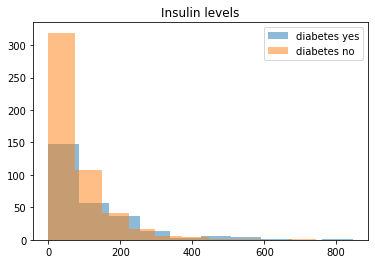

In [3]:
plt.hist(diabetes_yes['insulin'], alpha = .5, label = "diabetes yes")
plt.hist(diabetes_no['insulin'], alpha = .5, label = "diabetes no")
plt.legend(loc="upper right")
plt.title("Insulin levels")
plt.show()

From the histograms, it appears that this data doesn't fit a bell curve. 

To confirm, also retrieve the exact measures of skewness and kurtosis. You can do that with the [`describe()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html) method from scipy.stats.

In [4]:
print(stats.describe(diabetes_yes['insulin']))
print(stats.describe(diabetes_no['insulin']))

DescribeResult(nobs=268, minmax=(0, 846), mean=100.33582089552239, variance=19234.673318799265, skewness=1.8334954476833978, kurtosis=4.257259307676043)
DescribeResult(nobs=500, minmax=(0, 744), mean=68.792, variance=9774.345426853706, skewness=2.4912385539481763, kurtosis=9.35149885142989)


Based on both the histograms and the statistics, it appears that the samples of this variable are not normally distributed. So stop the analysis for now.

Later in the program, you'll learn about some options for how to proceed with the analysis when the data isn't normally distributed. But for now, try another variable: `glucose`. 

## 2. Do patients with diabetes have higher glucose levels on average than patients without diabetes?

Begin your analysis with the same procedures; check the sample distributions for normality.

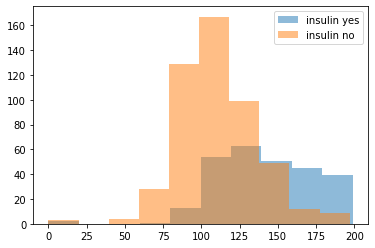

In [5]:
plt.hist(diabetes_yes['glucose'], alpha = .5, label = "insulin yes")
plt.hist(diabetes_no['glucose'], alpha = .5, label = "insulin no")
plt.legend(loc="upper right")
plt.show()

These samples look at least somewhat more normally distributed than the previous variable.

Plotting the histogram also has another benefit: it makes it easy to spot some misleading values. The histogram has plotted some values of `0` glucose. This is a small selection of the data, so you are safe simply dropping it and proceeding with the analysis.

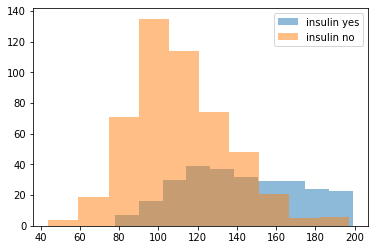

In [6]:
diabetes_yes_filtered_glucose = diabetes_yes[diabetes_yes['glucose']!= 0]
diabetes_no_filtered_glucose = diabetes_no[diabetes_no['glucose']!= 0]

plt.hist(diabetes_yes_filtered_glucose['glucose'], alpha = .5, label = "insulin yes")
plt.hist(diabetes_no_filtered_glucose['glucose'], alpha = .5, label = "insulin no")
plt.legend(loc="upper right")
plt.show()

The histogram looks cleaner now! But the distributions are still questionably normal. So get the skewness and kurtosis as well:

In [0]:
print(stats.describe(diabetes_yes_filtered_glucose['glucose']))
print(stats.describe(diabetes_no_filtered_glucose['glucose']))

DescribeResult(nobs=266, minmax=(78, 199), mean=142.31954887218046, variance=876.1125975315648, skewness=0.09012092392161705, kurtosis=-0.9626447554252175)
DescribeResult(nobs=497, minmax=(44, 197), mean=110.64386317907444, variance=613.8950882715649, skewness=0.6529596223112593, kurtosis=0.6434398312102663)


These results are workable! 

Because the data meets the assumptions, you can proceed to the t-test. 

In Python, you can use [`ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) from scipy.stats.

The two arguments will be the two arrays representing the glucose levels of patients with and without diabetes.

In [0]:
stats.ttest_ind(diabetes_yes_filtered_glucose['glucose'], diabetes_no_filtered_glucose['glucose'])

Ttest_indResult(statistic=15.700907488875874, pvalue=2.4782891993106313e-48)

You know that you can reject the null from either of these results:

1. The test statistic is greater than `1.96`.
2. The p-value is less than `0.05`. 

In fact, the p-value is *way* less than `0.05`. But rather than reporting the actual p-value, which is a tiny-yet-clunky number, it's common to round up the reports to a more readable `p < 0.01` or even `p < 0.001`.

Remember, the way to interpret this p-value is like this:

"There is a 0.1% chance of observing a difference as large as what is observed, even if the two population means are identical (the null hypothesis is true)."

By contrast, this interpretation is *wrong*:

"There is a 99.9% chance that the difference observed reflects a real difference between populations, and a 0.1% chance that the difference is due to chance."



Next, compute the confidence interval using the following formula:

$$(\overline{X}_{1}-\overline{X}_{2}) \pm 1.96 * {\sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}}$$



Unfortunately, scipy.stats doesn't include the confidence interval for you. However, you can write your own function to compute the confidence interval:


In [0]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(diabetes_yes_filtered_glucose['glucose'], diabetes_no_filtered_glucose['glucose'])

'The difference in means at the 95% confidence interval (two-tail) is between -35.846783869363435 and -27.504587516848602.'

You can interpret this result as saying that with 95% confidence, patients without diabetes have glucose levels that are on average between 35.84 mg/dL and 27.50 mg/dL lower than patients with diabetes.

## Visualizing the difference in means with a point plot

A *point plot* graphs the point estimates of a series of numbers, along with their respective error bars. With a point plot, you can visually evaluate whether there are significant differences in means. 

This can be useful for presenting visual results to a general audience, which is a topic which you'll return to later in the program.

For this, you will use [`pointplot()`](https://seaborn.pydata.org/generated/seaborn.pointplot.html) from seaborn. By default, seaborn will plot the mean of each data point in the array, using the 95% confidence interval as the error bar. Setting `join` to `False` eliminates the connecting line between the two points.

Here, you can see that the average glucose level is significantly higher for diabetics than for nondiabetics.

Note that in cases with a smaller difference in means, it may look like that there is no significant difference in means, even when there is one statistically. 

That's because in a t-test, you are estimating the confidence interval of the difference in means itself, rather than comparing the confidence interval of each mean. It's a subtle difference, and one that makes communicating the real-world "effects" of any differences that much harder. The below visual helps explain, but it isn't an entirely accurate representation of the test. 

[[Text(0, 0, 'diabetes_yes'), Text(0, 0, 'diabetes_no')]]

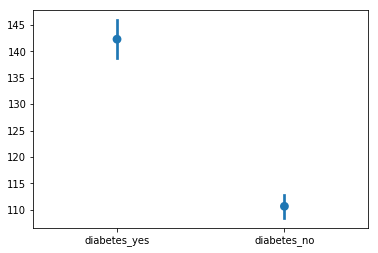

In [0]:
import seaborn as sns

g = sns.pointplot(data=[diabetes_yes_filtered_glucose['glucose'],
                        diabetes_no_filtered_glucose['glucose']], join=False)
                        
g.set(xticklabels = ['diabetes_yes', 'diabetes_no'])